In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
data = pd.read_csv('data.csv')
data.head()

,32.502345269453031,31.70700584656992
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


In [40]:
X = data.iloc[:, 0].values  # First column as X
Y = data.iloc[:, 1].values  # Second column as Y

In [41]:
# Normalize the data for stable gradient descent
X_norm = (X - np.mean(X)) / np.std(X)
Y_norm = (Y - np.mean(Y)) / np.std(Y)

In [42]:
def predict(X, m, b):
    return m * X + b

**Batch Gradient Descent (BGD)**

In [43]:
def batch_gradient_descent(X, Y, lr=0.01, epochs=1000):
    m, b = 0, 0  # Initialize parameters
    n = len(X)
    for _ in range(epochs):
        Y_pred = predict(X, m, b)
        dm = (-2/n) * sum(X * (Y - Y_pred))
        db = (-2/n) * sum(Y - Y_pred)
        m -= lr * dm
        b -= lr * db
    return m, b

**Stochastic Gradient Descent (SGD)**

In [44]:
def stochastic_gradient_descent(X, Y, lr=0.01, epochs=1000):
    m, b = 0, 0
    n = len(X)
    for _ in range(epochs):
        for i in range(n):
            Y_pred = predict(X[i], m, b)
            dm = -2 * X[i] * (Y[i] - Y_pred)
            db = -2 * (Y[i] - Y_pred)
            m -= lr * dm
            b -= lr * db
    return m, b

**Mini-Batch Gradient Descent (MBGD)**

In [45]:
def mini_batch_gradient_descent(X, Y, lr=0.01, epochs=1000, batch_size=10):
    m, b = 0, 0
    n = len(X)
    for _ in range(epochs):
        indices = np.random.permutation(n)
        X_shuffled, Y_shuffled = X[indices], Y[indices]
        for i in range(0, n, batch_size):
            X_batch, Y_batch = X_shuffled[i:i+batch_size], Y_shuffled[i:i+batch_size]
            Y_pred = predict(X_batch, m, b)
            dm = (-2/len(X_batch)) * sum(X_batch * (Y_batch - Y_pred))
            db = (-2/len(X_batch)) * sum(Y_batch - Y_pred)
            m -= lr * dm
            b -= lr * db
    return m, b

In [46]:
m_bgd, b_bgd = batch_gradient_descent(X_norm, Y_norm)
m_sgd, b_sgd = stochastic_gradient_descent(X_norm, Y_norm)
m_mbgd, b_mbgd = mini_batch_gradient_descent(X_norm, Y_norm)

In [47]:
X_sorted = np.linspace(min(X_norm), max(X_norm), 100)
Y_bgd_pred = predict(X_sorted, m_bgd, b_bgd)
Y_sgd_pred = predict(X_sorted, m_sgd, b_sgd)
Y_mbgd_pred = predict(X_sorted, m_mbgd, b_mbgd)


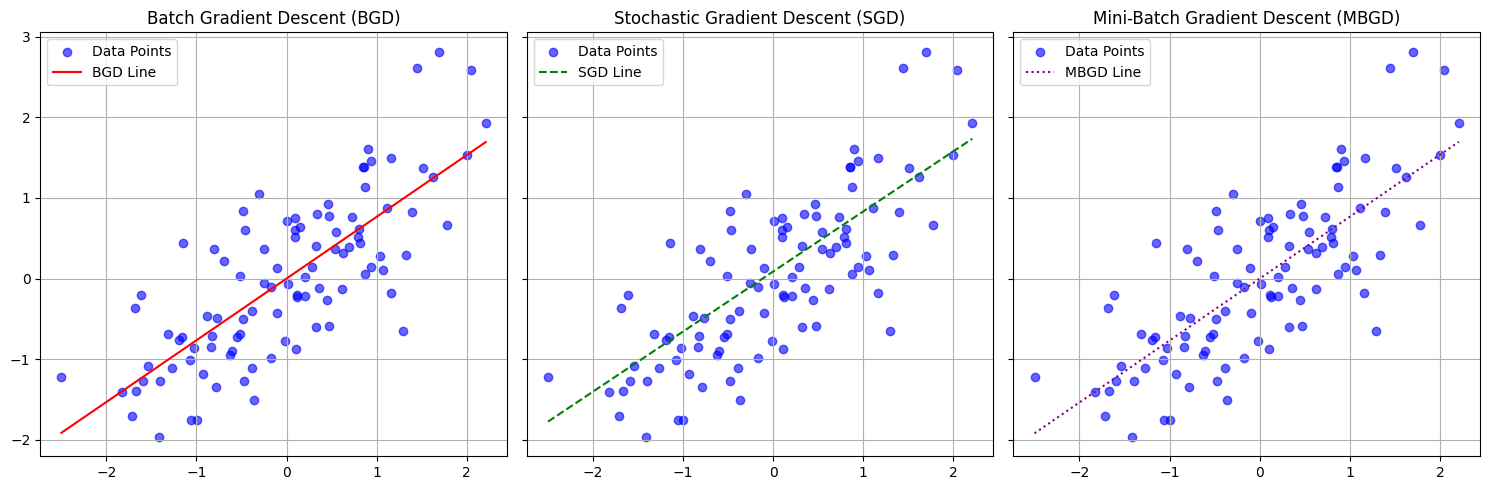

In [48]:
# Plot each method separately
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# BGD Plot
axs[0].scatter(X_norm, Y_norm, color='blue', alpha=0.6, label="Data Points")
axs[0].plot(X_sorted, Y_bgd_pred, color='red', label="BGD Line")
axs[0].set_title("Batch Gradient Descent (BGD)")
axs[0].legend()
axs[0].grid()

# SGD Plot
axs[1].scatter(X_norm, Y_norm, color='blue', alpha=0.6, label="Data Points")
axs[1].plot(X_sorted, Y_sgd_pred, color='green', linestyle='dashed', label="SGD Line")
axs[1].set_title("Stochastic Gradient Descent (SGD)")
axs[1].legend()
axs[1].grid()

# MBGD Plot
axs[2].scatter(X_norm, Y_norm, color='blue', alpha=0.6, label="Data Points")
axs[2].plot(X_sorted, Y_mbgd_pred, color='purple', linestyle='dotted', label="MBGD Line")
axs[2].set_title("Mini-Batch Gradient Descent (MBGD)")
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

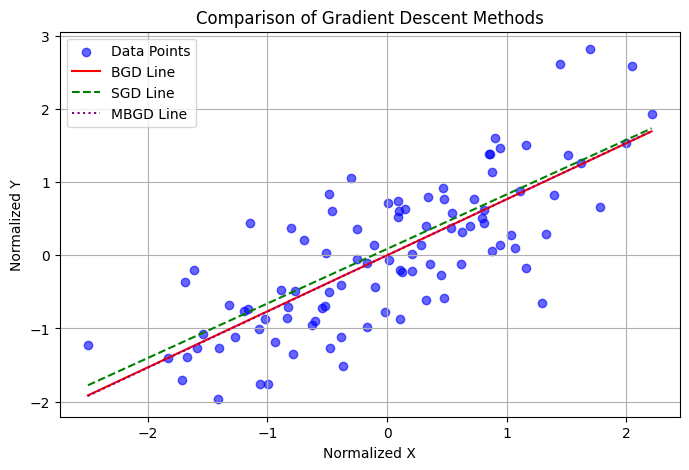

In [49]:
# Combined plot for comparison
plt.figure(figsize=(8, 5))
plt.scatter(X_norm, Y_norm, color='blue', alpha=0.6, label="Data Points")
plt.plot(X_sorted, Y_bgd_pred, color='red', label="BGD Line")
plt.plot(X_sorted, Y_sgd_pred, color='green', linestyle='dashed', label="SGD Line")
plt.plot(X_sorted, Y_mbgd_pred, color='purple', linestyle='dotted', label="MBGD Line")
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.title("Comparison of Gradient Descent Methods")
plt.legend()
plt.grid()
plt.show()

Batch Gradient Descent: Stable but slow, suitable for small datasets.                                                                   
Stochastic Gradient Descent: Fast but noisy, useful for large datasets and online learning.                                                                                                                                                       
Mini-Batch Gradient Descent: A trade-off between the two, commonly used in deep learning.